**Object detection using YOLO and Pretrained Model**  

In [6]:
!pip install ultralytics opencv-python



In [7]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow



In [8]:
model = YOLO("yolov8n.pt")  # downloads automatically if not present


In [11]:
from IPython.display import Javascript
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import PIL

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
      async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = '📷 Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        div.appendChild(video);
        document.body.appendChild(div);

        const stream = await navigator.mediaDevices.getUserMedia({video: true});
        video.srcObject = stream;
        await video.play();

        // Resize output to fit the video element.
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Wait for Capture button
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getVideoTracks()[0].stop();

        const dataUrl = canvas.toDataURL('image/jpeg', quality);
        return dataUrl;
      }
      takePhoto({quality: %f});
    ''' % quality)
    data = eval_js(js.data) # Pass the string data from the Javascript object
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Capture image
photo_filename = take_photo()
print("Saved photo to", photo_filename)

Saved photo to photo.jpg



image 1/1 /content/photo.jpg: 480x640 4 persons, 3 chairs, 1 cell phone, 173.0ms
Speed: 2.3ms preprocess, 173.0ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


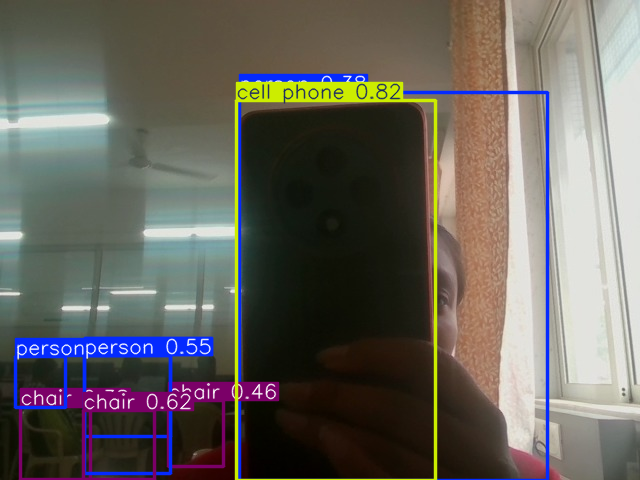

In [13]:
# Run YOLO on captured photo
results = model(photo_filename)

# Show results
for result in results:
    result.show()